# SWAG-P Simulation with Gap Plasmon Explorer

#### GP Explorer is a handly tools allowing to manipulate GP geometries and visualize its reflectance under differents configurations. Then, GP influence on reflectance from red-shift to Fano profils can be studying without programming skills.

To begin, remember that a GP<sup><a href="#note1">[1]</a></sup> -a guided electromagnetic wave into dielectric-, must be undertand as a mode of the nano cavity -the so called "gap"- between two close metallic regions.





<p id="note1"><b>[1]</b> A solution of Maxwell's equations without source.</p>

In the next cell, we will set up the environment by importing necessary modules and defining paths to required data files ensuring that all dependencies are correctly loaded and accessible for subsequent computations.

In [1]:
# %% Cellul 1 – Initialization
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Path to the modules folder
module_path = os.path.abspath(os.path.join('/home/chardon-grossard/Bureau/SWAG-P/Gap_Plasmon_2D/Workspace/', 'modules'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Path Workspace
workspace_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Path Data
data_dir = os.path.join(workspace_dir, "data")
os.makedirs(data_dir, exist_ok=True)

# Total path json
json_path = os.path.join(data_dir, "combined_materials.json")

In [2]:
json_path

'/home/chardon-grossard/Bureau/SWAG-P/Gap_Plasmon_2D/Workspace/data/combined_materials.json'

In [3]:
# Remplacez par le chemin absolu de votre dossier de projet
project_dir = r"/home/chardon-grossard/Bureau/SWAG-P/Gap_Plasmon_2D/Workspace/"
os.chdir(project_dir)
print("Current working directory:", os.getcwd())

Current working directory: /home/chardon-grossard/Bureau/SWAG-P/Gap_Plasmon_2D/Workspace


In [4]:
# %% Cellul 2 – Geometry settings
from geometry_settings import create_geometry_widget, geometry_config, wave

# Geometry widget
geom_widget = create_geometry_widget()
display(geom_widget)


GEOMETRY_CONFIG has been updated in the global (__main__) space.


In [5]:
# %% Cellul 3 – Material selector
from material_selector import create_material_selector

material_selector_widget = create_material_selector(json_path)
display(material_selector_widget)


MATERIALS_CONFIG has been defined in the global __main__ space


MATERIALS_CONFIG has been defined in the global __main__ space


In [9]:
# %% Cellul 4 – Material configuration
lambda_test = 800  # Wavelenght in nanometers

import __main__
if not hasattr(__main__, "MATERIALS_CONFIG"):
    print("Please run the cell below to load the materials configuration.")
else:
    from Material_Configuration import build_material_configuration_dynamic
    materials_perm = build_material_configuration_dynamic(__main__.MATERIALS_CONFIG, lambda_test, json_path)
    print("Material configuration:")
    for key, value in materials_perm.items():
        print(f"{key} : {value}")


Material configuration:
perm_env : (1+0j)
perm_dielec : (1.7635840000000003+0j)
perm_sub : (2.282506834619155+0j)
perm_reso : (-40.06029991951217-0.2413306314051874j)
perm_metalliclayer : (-27.172511539078222+2.826754475180965j)
perm_accroche : (-3.074309432706581+14.002769236764227j)
perm_func : 2.0
perm_mol : 1.0


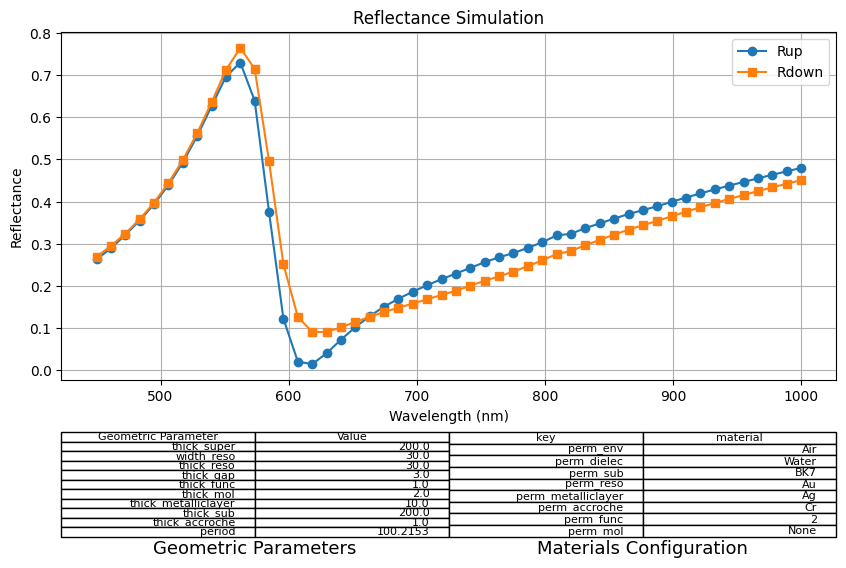

End of simulation, reflectance for lambda = 1000.0 : 0.47991618174238676 0.45095308286424635


<Figure size 640x480 with 0 Axes>

In [10]:
# %% Cellul 5 – Simulation
from simulate_and_plot import run_simulation

lambda_range = np.linspace(450, 1000, 50)  # en nm
n_mod = 50

import __main__
if not hasattr(__main__, "MATERIALS_CONFIG"):
    print("Please run the cell 3 to load the materials configuration.")
else:
    Rup_values, Rdown_values = run_simulation(lambda_range, n_mod, geometry_config, wave, __main__.MATERIALS_CONFIG, json_path)
    print("End of simulation, reflectance for lambda =", lambda_range[-1], ":", Rup_values[-1], Rdown_values[-1])
